# Breast Cancer Detection with Machine Learning Algorithms

In [1801]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
# you can use the following command to install all the required packages
%pip install -r group_15_requirements.txt

import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1727]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns

print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")


NumPy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.4
Seaborn version: 0.13.2


In [1728]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

# Load Dataset

In [1729]:
df = pd.read_csv("Dataset.csv")
# Remove the first column
df = df.iloc[:, 1:]

In [1730]:
df = df.drop(df.columns[0], axis=1)

## Display the updated DataFrame to verify the first column has been removed

In [1731]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [1732]:
df.shape

(569, 33)

In [1733]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [1734]:
#Index names of the dataset
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# Dataset Summary

In [1735]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [1736]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [1737]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [1738]:
type(df.columns)

pandas.core.indexes.base.Index

In [1739]:
l = list(df.columns)
print(l)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [1740]:
features_mean = l[1:11]

features_se = l[11:20]

features_worst = l[21:]

In [1741]:
print(features_mean)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean']


In [1742]:
print(features_se)

['fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se']


In [1743]:
print(features_worst)

['fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [1744]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


# Relationship between the different features and the diagnosis of the tumor

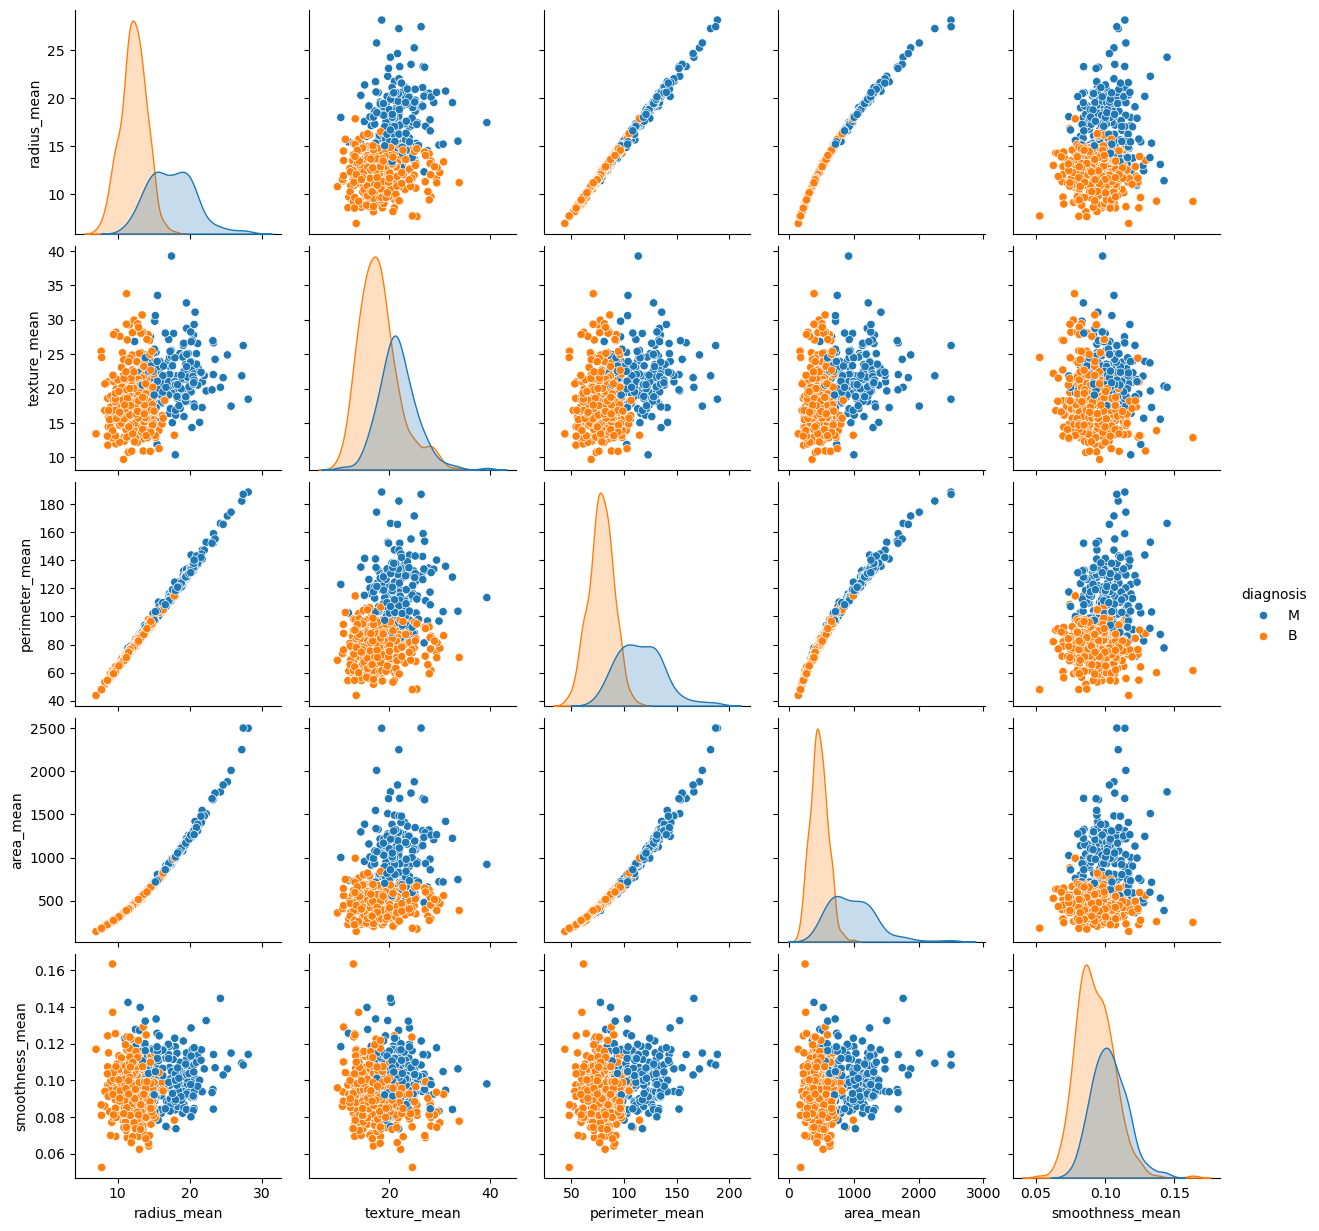

In [1745]:
# Relationship between the different features and the diagnosis of the tumor

# Create a scatter plot matrix
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'])

# Show the plot
plt.show()

# Bar plot to analyze the data and compare the distribution of malignant & benign tumors 

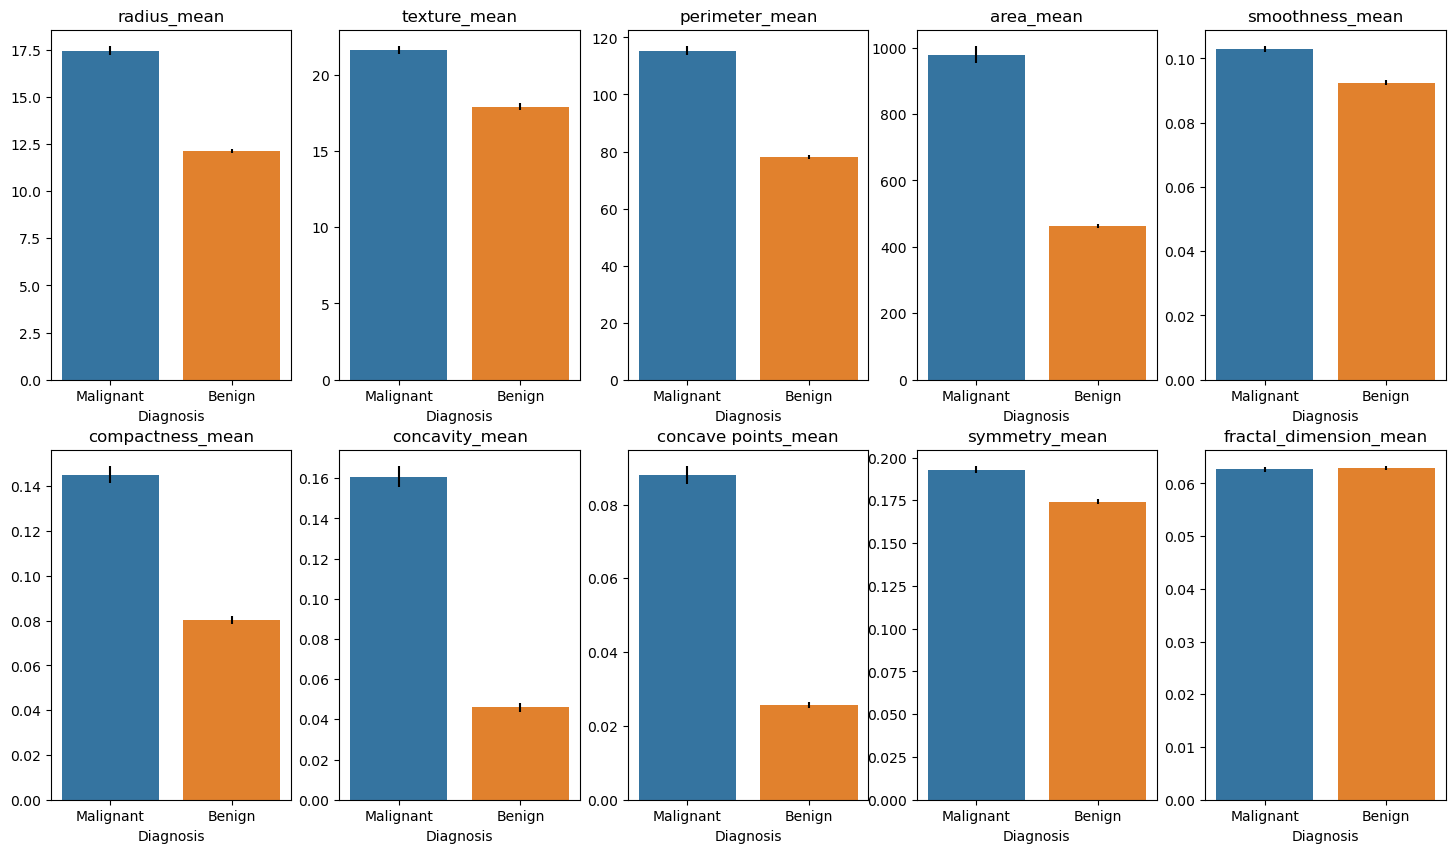

In [1746]:
# Bar plot to analyze the data and compare the distribution of malignant and benign tumors 
# by features radius_mean, area_mean, concavity_mean.
# Create separate dataframes for malignant and benign tumors
malignant = df[df['diagnosis'] == 'M']
benign = df[df['diagnosis'] == 'B']

# Select the features of interest (e.g. radius_mean, area_mean, concavity_mean)
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Create a figure with subplots
fig, axes = plt.subplots(2, 5, figsize=(18, 10))

# Iterate through the features
for i, feature in enumerate(features[:int(len(features)/2)]):
    # Create a bar chart for each feature
    ax = axes[0, i]
    ax.bar(['Malignant', 'Benign'], [malignant[feature].mean(), benign[feature].mean()], yerr=[malignant[feature].sem(), benign[feature].sem()], color=['#3574a0', '#e1812d'])
    ax.set_xlabel('Diagnosis')
    ax.set_title(feature)
    
for i, feature in enumerate(features[int(len(features)/2):]):
    # Create a bar chart for each feature
    ax = axes[1, i]
    ax.bar(['Malignant', 'Benign'], [malignant[feature].mean(), benign[feature].mean()], yerr=[malignant[feature].sem(), benign[feature].sem()], color=['#3574a0', '#e1812d'])
    ax.set_xlabel('Diagnosis')
    ax.set_title(feature)


# Show the figure
plt.show()


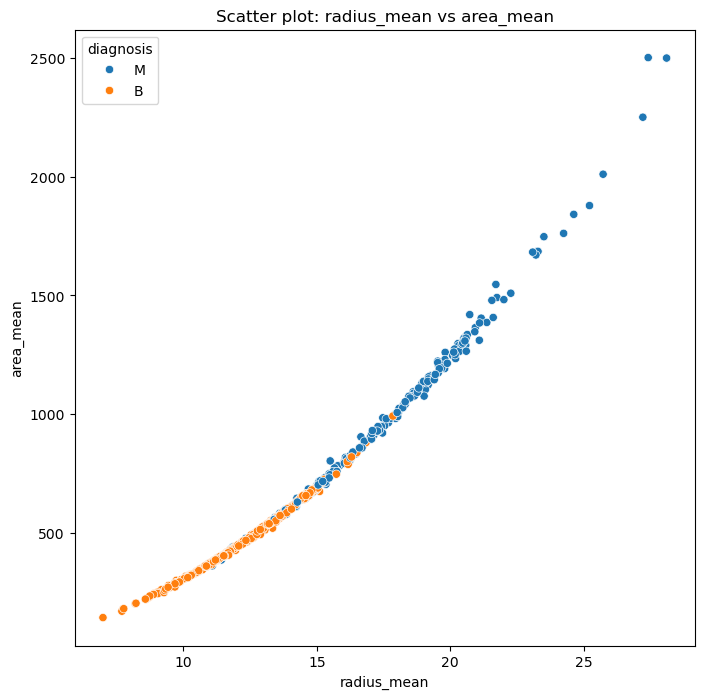

In [1747]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x='radius_mean',y='area_mean',data=df,hue='diagnosis',ax=ax)
plt.xlabel('radius_mean')
plt.ylabel('area_mean')
plt.title('Scatter plot: radius_mean vs area_mean')
plt.show()

In [1748]:
df['diagnosis'].unique()
# M = Malignant, B = Benign 

array(['M', 'B'], dtype=object)

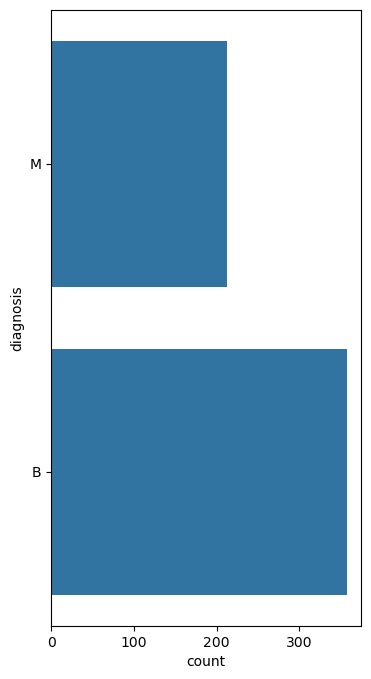

In [1749]:
figsize = (4, 8)
fig, ax = plt.subplots(figsize=figsize)
sns.countplot(df['diagnosis'],label='Count');

In [1750]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [1751]:
df.shape

(569, 33)

# Explore the data

In [1752]:
# Summary of all the columns
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [1753]:
len(df.columns)

33

In [1754]:
# Correlation Plot

numeric_df = df.select_dtypes(include=[float, int])

# Compute correlation matrix
corr = numeric_df.corr()
print(corr)

                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.

In [1755]:
corr.shape

(32, 32)

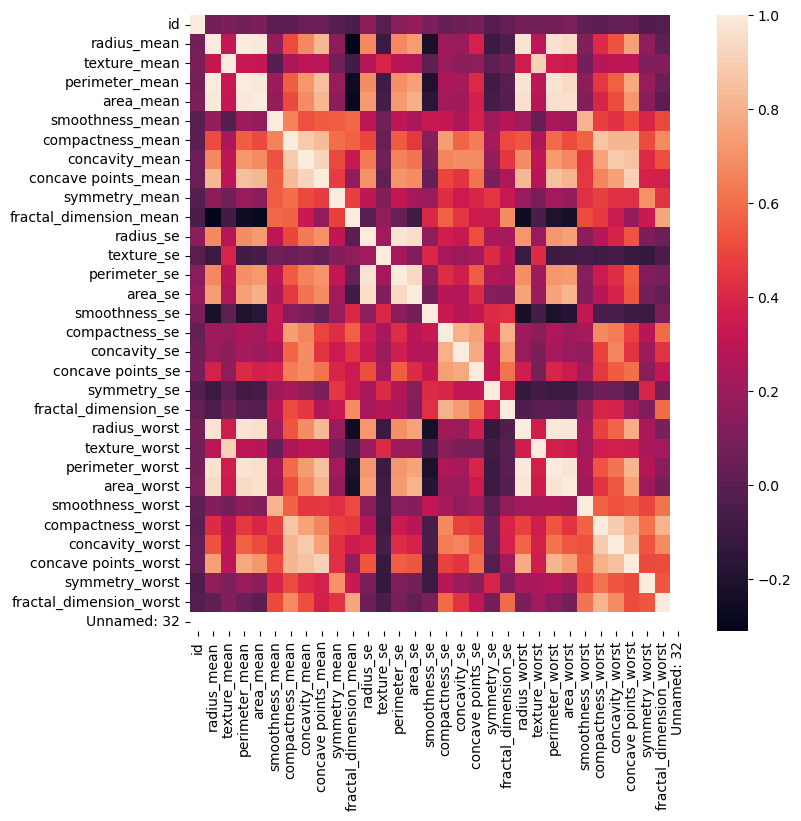

In [1756]:
plt.figure(figsize=(8,8))
sns.heatmap(corr);

In [1757]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [1758]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [1759]:
df['diagnosis'].unique()

array([1, 0])

In [1760]:
X = df.drop('diagnosis',axis = 1)
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [1761]:
y = df['diagnosis']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

# Split dataset into training and test set

In [1762]:
# # split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [1763]:
df.shape

(569, 33)

In [1764]:
X_train.shape

(398, 32)

In [1765]:
X_test.shape

(171, 32)

In [1766]:
y_train.shape

(398,)

In [1767]:
y_test.shape

(171,)

In [1768]:
X_train.head(1)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
555,924934,10.29,27.61,65.67,321.4,0.0903,0.07658,0.05999,0.02738,0.1593,...,34.91,69.57,357.6,0.1384,0.171,0.2,0.09127,0.2226,0.08283,NaN


In [1769]:
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [1770]:
X_train

array([[-0.24473459, -1.08790173,  1.87725208, ..., -1.04035642,
        -0.12364256,         nan],
       [-0.2451567 , -0.2389739 , -0.67687643, ..., -1.30937987,
        -0.46544572,         nan],
       [-0.24509502, -1.14578317, -0.96825651, ...,  0.02818055,
        -0.42943897,         nan],
       ...,
       [-0.24502621, -0.80951955, -0.26712319, ...,  0.59494344,
         2.32220689,         nan],
       [-0.25068136,  0.33708426, -1.70125952, ...,  0.45589761,
         0.82453505,         nan],
       [-0.25065023, -0.68824415, -1.0638656 , ..., -0.46905942,
         0.7092091 ,         nan]])

# Machine learning models

# 1. Logistic Regression

In [1771]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [1772]:
y_pred = lr.predict(X_test)

In [1773]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [1774]:
y_test

497    0
128    0
437    0
6      1
14     1
      ..
89     0
218    1
347    0
548    0
310    0
Name: diagnosis, Length: 171, dtype: int64

In [1775]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9766081871345029


In [1776]:
lr_acc = accuracy_score(y_test,y_pred)
print(lr_acc)

0.9766081871345029


In [1777]:
results = pd.DataFrame()
results

""


In [1778]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression Method'],'Accuracy':[lr_acc]})
results = pd.concat([results, tempResults])
results = results[['Algorithm','Accuracy']]
logicsticRegressionResults=results
logicsticRegressionResults

,Algorithm,Accuracy
0,Logistic Regression Method,0.976608


# Decision Tree Classifier


In [1779]:
from sklearn.tree import DecisionTreeClassifier
print(accuracy_score(y_test,y_pred))

0.9766081871345029


In [1780]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9766081871345029


In [1781]:
dtc_acc = accuracy_score(y_test, y_pred)
print(dtc_acc)

0.9766081871345029


In [1782]:
tempResults = pd.DataFrame({'Algorithm':['Decision Tree Classifier Method'],'Accuracy':[lr_acc]})
results = pd.concat([results, tempResults])
results = results[['Algorithm','Accuracy']]
decisionTreeClassifierResults=results
decisionTreeClassifierResults

,Algorithm,Accuracy
0,Logistic Regression Method,0.976608
0,Decision Tree Classifier Method,0.976608


# Random Forest Classifier

In [1783]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [1784]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

In [1785]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9473684210526315


In [1786]:
rfc_acc = accuracy_score(y_test, y_pred)
print(rfc_acc)

0.9473684210526315


In [1787]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train,y_train)

SVC()

In [1788]:
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier Method'], 'Accuracy':[rfc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
randomForestClassifierResults=results
randomForestClassifierResults


,Algorithm,Accuracy
0,Logistic Regression Method,0.976608
0,Decision Tree Classifier Method,0.976608
0,Random Forest Classifier Method,0.947368


# Support Vector Classifier

In [1789]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train,y_train)

SVC()

In [1790]:
y_pred = svc.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [1791]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9473684210526315


In [1792]:
tempResults = pd.DataFrame({'Algorithm':['Support Vector Classifier Method'], 'Accuracy':[rfc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
supportVectorClassifierMethodResults=results
supportVectorClassifierMethodResults

,Algorithm,Accuracy
0,Logistic Regression Method,0.976608
0,Decision Tree Classifier Method,0.976608
0,Random Forest Classifier Method,0.947368
0,Support Vector Classifier Method,0.947368


# Comparison of Algorithm Accuracies

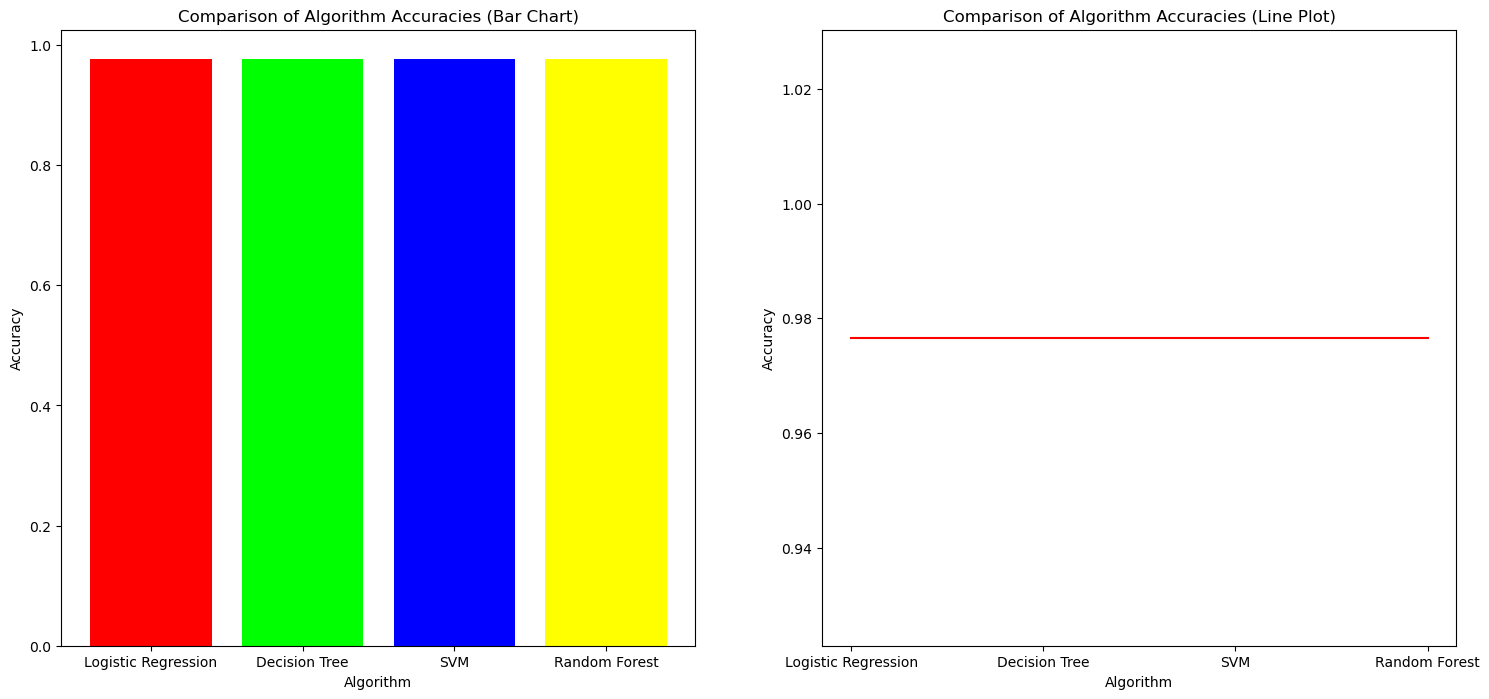

In [1793]:
import matplotlib.pyplot as plt

# List of algorithms
algorithms = ["Logistic Regression", "Decision Tree", "SVM", "Random Forest"]

# Extract accuracy scores from the results DataFrames
accuracies = [
    logicsticRegressionResults['Accuracy'].values[0],
    decisionTreeClassifierResults['Accuracy'].values[0],
    supportVectorClassifierMethodResults['Accuracy'].values[0],
    randomForestClassifierResults['Accuracy'].values[0]
]

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Create a bar chart to visualize the results
colors = ["#ff0000", "#00ff00", "#0000ff", "#ffff00"]
for i, algo in enumerate(algorithms):
    ax1.bar(algo, accuracies[i], color=colors[i])

# Add labels and title to the bar chart
ax1.set_xlabel("Algorithm")
ax1.set_ylabel("Accuracy")
ax1.set_title("Comparison of Algorithm Accuracies (Bar Chart)")

# Create a line plot to visualize the results
ax2.plot(algorithms, accuracies, color='#ff0000')

# Add labels and title to the line plot
ax2.set_xlabel("Algorithm")
ax2.set_ylabel("Accuracy")
ax2.set_title("Comparison of Algorithm Accuracies (Line Plot)")

# Show the figure
plt.show()

In [1794]:

from sklearn.ensemble import RandomForestClassifier

# Customize hyperparameters
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred))

rfc_acc = accuracy_score(y_test, y_pred)

# Record the results
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier Method'], 'Accuracy':[rfc_acc]})
results = pd.concat([results, tempResults])
results = results[['Algorithm','Accuracy']]

# Feature Importance
feature_importances = rfc.feature_importances_
print("Feature Importances: ", feature_importances)

Random Forest Accuracy:  0.9649122807017544
Feature Importances:  [0.00623281 0.02565045 0.01026507 0.05250765 0.04774531 0.00619062
 0.01725315 0.03758143 0.1138047  0.00240672 0.00351816 0.01955692
 0.00296878 0.01447739 0.04089529 0.0038607  0.00397629 0.00834527
 0.00311778 0.00546417 0.00505311 0.09917738 0.01437937 0.12502357
 0.12572923 0.01086924 0.0157578  0.04745033 0.10878787 0.01869144
 0.00326201]


In [1795]:
import xgboost as xgb

# Define the model
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict with the trained model
y_pred = model.predict(X_test)

print("XGBoost Accuracy: ", accuracy_score(y_test, y_pred))

xgb_acc = accuracy_score(y_test, y_pred)

# Record the results
tempResults = pd.DataFrame({'Algorithm':['XGBoost Method'], 'Accuracy':[xgb_acc]})
results = pd.concat([results, tempResults])
results = results[['Algorithm','Accuracy']]
xgBoostresults=results

XGBoost Accuracy:  0.9532163742690059


In [1796]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}

# Implement GridSearchCV to find the best parameters
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)

# Train SVM with the best parameters
svc = grid_search.best_estimator_
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
print("SVM Accuracy: ", accuracy_score(y_test, y_pred))

svc_acc = accuracy_score(y_test, y_pred)

# Record the results
tempResults = pd.DataFrame({'Algorithm':['SVM Method'], 'Accuracy':[svc_acc]})
results = pd.concat([results, tempResults])
results = results[['Algorithm','Accuracy']]
gridSearchCV=results

Best parameters:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVM Accuracy:  0.9824561403508771


In [1797]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Ensure X_train and y_train are defined
if 'X_train' in globals() and 'y_train' in globals():
	# Define the model
	gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

	# Train the model
	gbc.fit(X_train, y_train)

	# Predict with the trained model
	y_pred = gbc.predict(X_test)

	# Calculate accuracy
	gbc_acc = accuracy_score(y_test, y_pred)
	print("Gradient Boosting Accuracy: ", gbc_acc)

	# Record the results
	tempResults = pd.DataFrame({'Algorithm': ['Gradient Boosting Method'], 'Accuracy': [gbc_acc]})
	results = pd.concat([results, tempResults])
	results = results[['Algorithm', 'Accuracy']]
	display(results)
else:
	print("X_train or y_train is not defined. Please ensure the cell defining these variables is executed.")

Gradient Boosting Accuracy:  0.935672514619883


,Algorithm,Accuracy
0,Logistic Regression Method,0.976608
0,Decision Tree Classifier Method,0.976608
0,Random Forest Classifier Method,0.947368
0,Support Vector Classifier Method,0.947368
0,Random Forest Classifier Method,0.964912
0,XGBoost Method,0.953216
0,SVM Method,0.982456
0,Gradient Boosting Method,0.935673


In [1798]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
data = {
    'Algorithm': [
        'Logistic Regression',
        'Decision Tree Classifier',
        'XGBoost Method',
        'Random Forest',
        'Support Vector Machine',
        'Gradient Boosting',
    ],
    'Current Accuracy': [
        lr_acc,
        dtc_acc,
        xgb_acc,
        rfc_acc,
        svc_acc,
        gbc_acc ,
   
        # Updated dynamically
    ],
    'Previous Accuracy': [
        None,  # No previous result for Logistic Regression
        None,
        None,# No previous result for Decision Tree Classifier
        0.593,
        0.720,
        0.640
    ]
}

# Create DataFrame
comparison_df = pd.DataFrame(data)

# Calculate the difference where both accuracies are available
comparison_df['Difference'] = comparison_df['Current Accuracy'] - comparison_df['Previous Accuracy']

# Display the comparison table
print("Comparison Table:")
display(comparison_df)


Comparison Table:


,Algorithm,Current Accuracy,Previous Accuracy,Difference
0,Logistic Regression,0.976608,NaN,NaN
1,Decision Tree Classifier,0.976608,NaN,NaN
2,XGBoost Method,0.953216,NaN,NaN
3,Random Forest,0.964912,0.593,0.371912
4,Support Vector Machine,0.982456,0.720,0.262456
5,Gradient Boosting,0.935673,0.640,0.295673


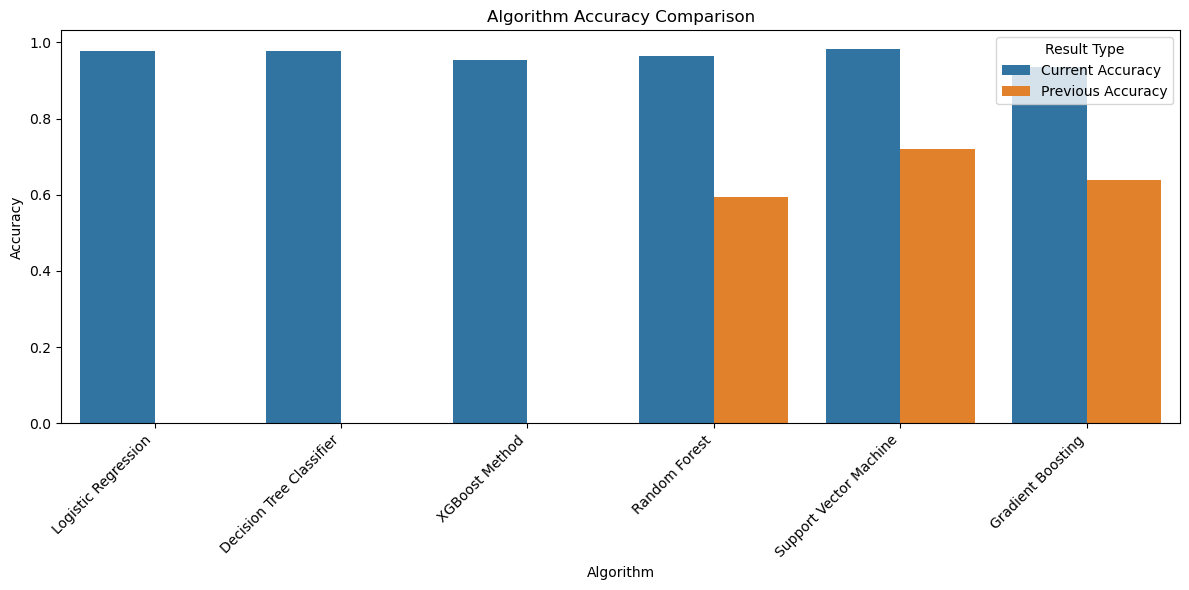

In [1799]:
# Melt the DataFrame to long format for plotting
melted_df = comparison_df.melt(id_vars='Algorithm', value_vars=['Current Accuracy', 'Previous Accuracy'], 
                               var_name='Type', value_name='Accuracy')

# Define a color palette that alternates colors
palette = {'Current Accuracy': '#1f77b4', 'Previous Accuracy': '#ff7f0e'}

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Algorithm', y='Accuracy', hue='Type', palette=palette)
plt.title('Algorithm Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Result Type')
plt.tight_layout()
plt.show()


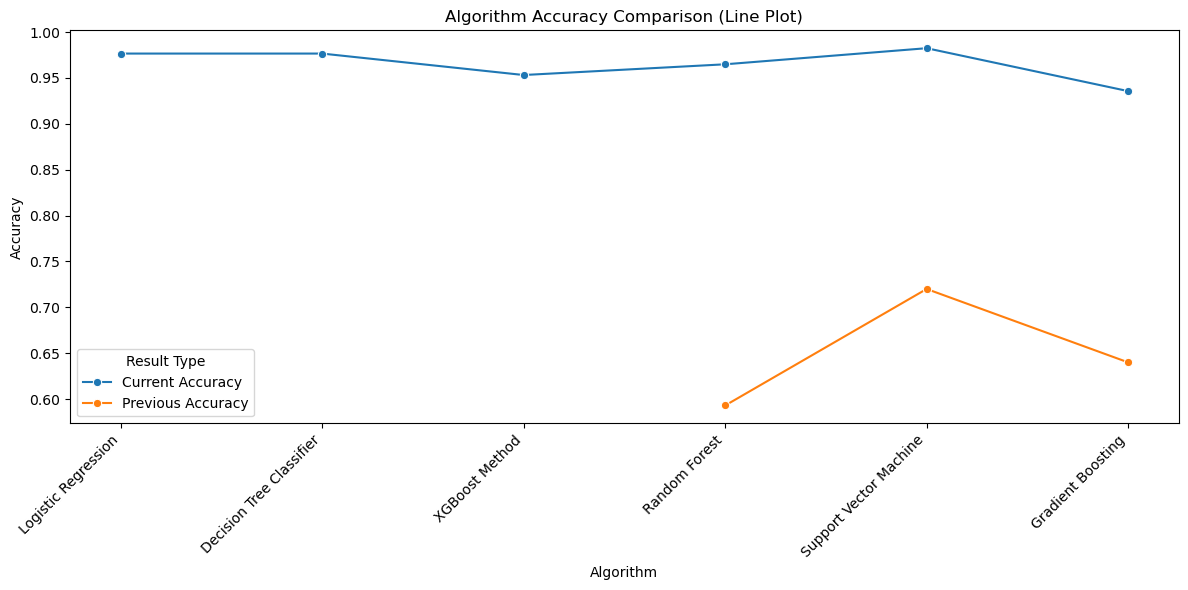

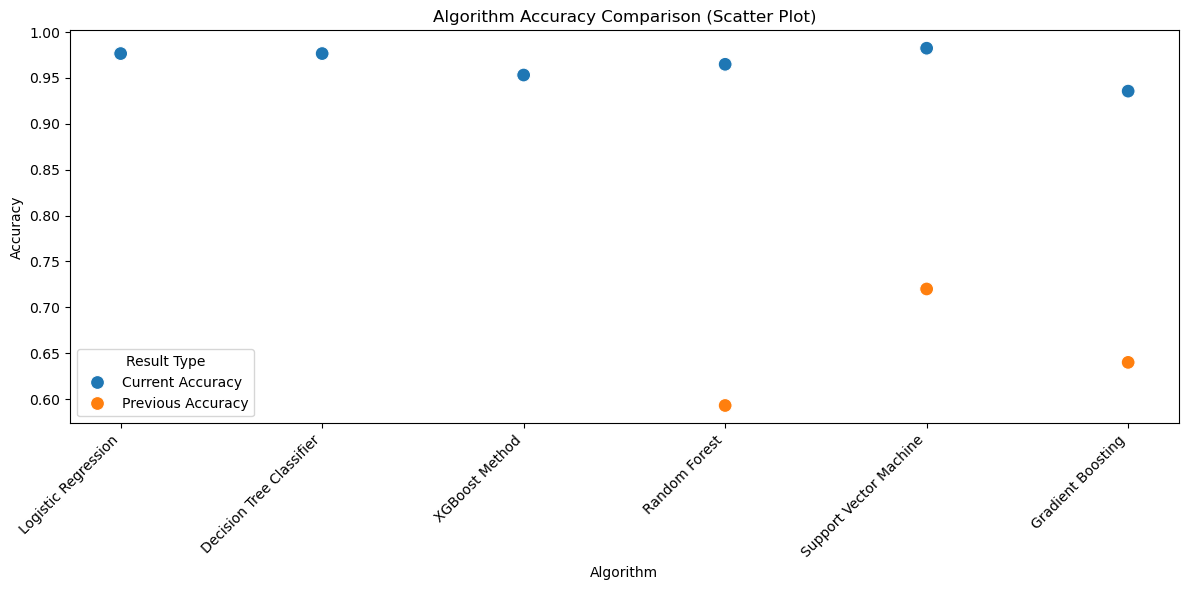

In [1800]:
# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x='Algorithm', y='Accuracy', hue='Type', marker='o', palette=palette)
plt.title('Algorithm Accuracy Comparison (Line Plot)')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Result Type')
plt.tight_layout()
plt.show()

# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=melted_df, x='Algorithm', y='Accuracy', hue='Type', s=100, palette=palette)
plt.title('Algorithm Accuracy Comparison (Scatter Plot)')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Result Type')
plt.tight_layout()
plt.show()
